# Alternative Recipe 
Jenny Lee, May 2023

```{note}
Kindly note that this web page solely offers a synopsis of the **Alternative Recipe** project. The comprehensive set of scripts and codes used in the project is available in the corresponding [GitHub repository](https://github.com/jlee2843/food-choice-app).
```

In [80]:
import pandas as pd 
import numpy as np
import IPython
from IPython.display import YouTubeVideo
from IPython.display import HTML
from myst_nb import glue
import fontawesome
import schemdraw
from schemdraw.flow import *
from schemdraw import flow

## Project Outline

```{admonition} Data science toolbox used in this project
:class: tip, dropdown
- Data wrangling and cleaning 
- Web application development and deployment 
- Statistical comparison using MSE
```

<!-- ![Python](https://img.shields.io/badge/python-3670A0?style=for-the-badge&logo=python&logoColor=ffdd54)   ![Pandas](https://img.shields.io/badge/pandas-%23150458.svg?style=for-the-badge&logo=pandas&logoColor=white)   ![NumPy](https://img.shields.io/badge/numpy-%23013243.svg?style=for-the-badge&logo=numpy&logoColor=white)   ![SciPy](https://img.shields.io/badge/SciPy-%230C55A5.svg?style=for-the-badge&logo=scipy&logoColor=%white)  {bdg-primary}`Streamlit` -->

Alternative Recipe is a dedicated project aimed at heightening awareness about the escalating concerns associated with global climate change. Notably, it has been honored with the esteemed Best of Rest Award at the [2023 Climate Change-Makers Challenge](https://climatechangemakers2023.devpost.com)—an international hackathon with more than 350 participants focused on devising innovative solutions to address the pressing dilemma of climate change. 

In the course of this project, I have successfully implemented an [**alternative recipe generator**](https://jlee2843-food-choice-app-streamlit-app-uelzzr.streamlit.app) designed to replace the primary ingredient responsible for the highest greenhouse gas emissions with a more environmentally friendly substitute. The application harnesses the capabilities of the Streamlit library, offering a user-friendly web-based interface for seamless accessibility and interaction.

In [39]:
from IPython.display import YouTubeVideo, display, HTML

video_id = "U8rOM4LPRRM"

# Define HTML and CSS styles to center the video
video_html = f"""
<div style="display: flex; justify-content: center;">
    <iframe width="560" height="315" src="https://www.youtube.com/embed/{video_id}" frameborder="0" allowfullscreen></iframe>
</div>
"""

# Display the centered YouTube video
display(HTML(video_html))

## Overall Process

### Data Preprocessing
Firstly, we obtain data that delineates the greenhouse gas (GHG) emission factor per fixed amount of food in kilograms, as outlined by [Poore, J., & Nemeck, T. (2018)](https://www.science.org/doi/10.1126/science.aaq0216) Concurrently, nutritional information per food is sourced from [Statistics Canada](https://www.canada.ca/en/health-canada/services/food-nutrition/healthy-eating/nutrient-data/canadian-nutrient-file-2015-download-files.html). In the case where the food item is labeled with non-standard units such as *cases* and *packages*, additional steps are necessary to convert them into standard units.

Please open the following cell to view the flowchart illustrating the data preprocessing process.

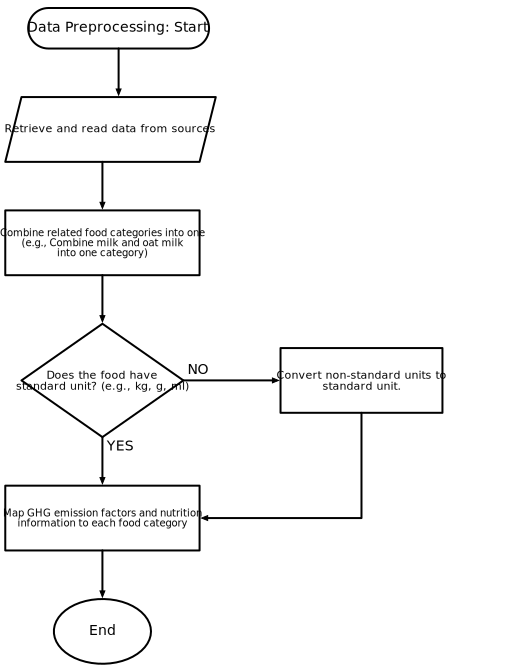

In [179]:
with schemdraw.Drawing() as d:
      d += Start().label("Data Preprocessing: Start")
      d += Arrow().down(d.unit/2)
      
      d += Data(w=6).label("Retrieve and read data from sources", fontsize=11)
      d += Arrow().down(d.unit/2)

      d += Box(w=6).label("Combine related food categories into one \n \
            (e.g., Combine milk and oat milk \n into one category)", fontsize=10)
      d += Arrow().down(d.unit/2)

      d+= (decision := Decision(w = 5, h= 3.5,
                       S = "YES", 
                       E = "NO").label("Does the food have \n standard unit? (e.g., kg, g, ml)", fontsize=11))

      d+= Arrow().length(d.unit/2)
      good =  (true := Box(w = 6,).label("Map GHG emission factors and nutrition \n information to \
            each food category", fontsize=10))
      d+= good

      d += Arrow().down(d.unit/2)
      d+= (end := Ellipse().label("End"))
            
      d+= Arrow().right(d.unit).at(decision.E)
      wrong =  (false := Box(w = 5).label("Convert non-standard units to \n  standard unit.", fontsize=11))
      d+= wrong
      flow.Wire('|-', arrow='->').at(wrong.S).to(good.E)

### Finding the Closest Alternative

### Total Emission Calculation with User Input

After gathering user inputs for the recipe, we proceed to calculate the total greenhouse gas (GHG) emissions incurred by the user's recipe. Should the total GHG emission surpass a predefined threshold, we propose alternative ingredients to replace existing ones known for high GHG emissions. The user has the flexibility to substitute as many ingredients as desired.

Following the substitutions, the user can finalize the new recipe with the replaced ingredients. If the new recipe succeeds in reducing GHG emissions compared to the original recipe, the user is informed of the total GHG reduction. This reduction is then correlated with the number of mature trees that need to be planted to offset the environmental impact.

If the user desires to receive the new recipe via email, the program will facilitate this by sending an email containing the details of the revised recipe to the user's specified email address.

Please open the following cell to view the flowchart illustrating the total emission calculation and the process of suggesting an alternative recipe.

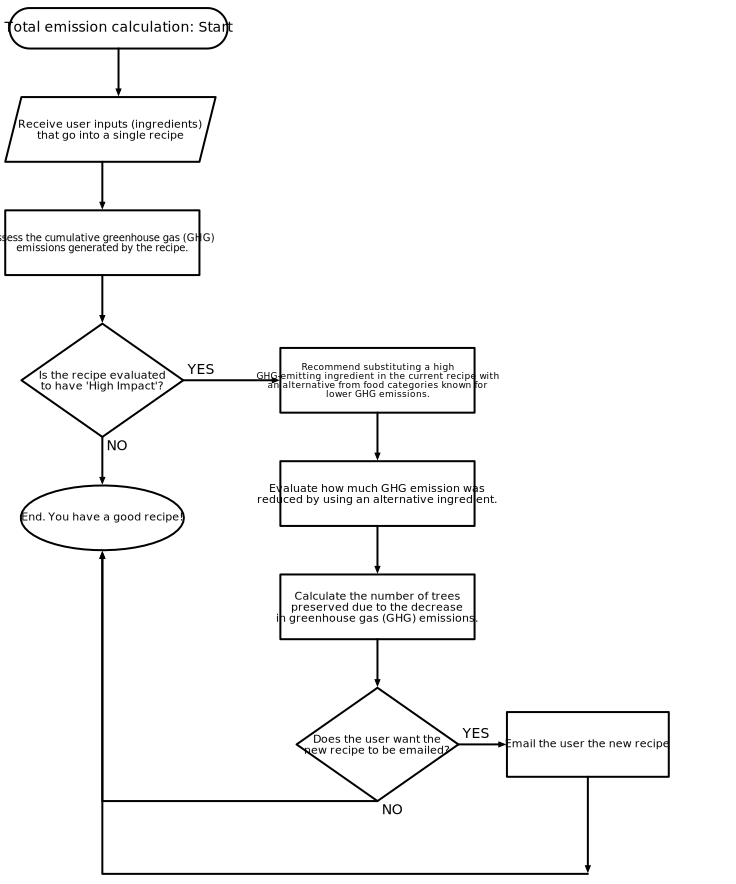

In [178]:
with schemdraw.Drawing() as d:
      d += Start().label("Total emission calculation: Start")
      d += Arrow().down(d.unit/2)
      
      d += Data(w=6).label("Receive user inputs (ingredients) \n that go into a single recipe", fontsize=11)
      d += Arrow().down(d.unit/2)

      d += Box(w=6).label("Assess the cumulative greenhouse gas (GHG) \n emissions generated by the recipe.", fontsize=10)
      d += Arrow().down(d.unit/2)

      d+= (decision := Decision(w = 5, h= 3.5,
                       S = "NO", 
                       E = "YES").label("Is the recipe evaluated \n to have 'High Impact'?", fontsize=11))

      d += Arrow().down(d.unit/2)
      end_ =  (end := Ellipse().label("End. You have a good recipe!", fontsize=11))
      d += end_

      d+= Arrow().right(d.unit).at(decision.E)
      bad =  (false := Box(w = 6,).label("Recommend substituting a high \n GHG-emitting ingredient \
            in the current recipe with\n an alternative from \
                  food categories known for \n  lower GHG emissions.", fontsize=9))
      d+= bad

      d += Arrow().down(d.unit/2).at(bad.S)
      bad2 = Box(w=6).label("Evaluate how much GHG emission was\n reduced by using an alternative ingredient.", fontsize=11)
      d += bad2

      d += Arrow().down(d.unit/2)
      d += Box(w=6).label("Calculate the number of trees \n \
      preserved due to the decrease \n \
      in greenhouse gas (GHG) emissions.", fontsize=11)

      d += Arrow().down(d.unit/2)        
      d+= (decision2 := Decision(w = 5, h= 3.5,
                       S = "NO", 
                       E = "YES").label("Does the user want the \n new recipe to be emailed?", fontsize=11))

      (false := flow.Wire('-|', arrow='->').to(end_.S))

      d += Arrow().right(d.unit/2).at(decision2.E)
      email = Box(w=5).label("Email the user the new recipe", fontsize=11)
      d+= email
      d += Arrow().down(d.unit).at(email.S)
      flow.Wire('-|', arrow='->').to(end_.S)




## Final Deliverable

```{figure} _images/alternative-recipe.png
---
name: web-app
---
Alternative Recipe application start page
```

[Alternative Recipe](https://jlee2843-food-choice-app-streamlit-app-uelzzr.streamlit.app) is a **web-based application** designed to assess the carbon footprints associated with various food categories and calculate the total kilograms of CO2-equivalent emissions a meal would generate. The distinctive feature of the application lies in its ability to propose a more sustainable recipe. Users can modify their original recipes by incorporating environmentally friendly ingredients, and the application suggests alternatives by comparing nutritional values. These suggested alternatives aim to reduce the overall CO2 emissions produced by the meal.

Moreover, the application offers a practical feature allowing users to request their modified recipes to be sent directly to their emails, enhancing convenience and user experience.

## Conclusion

As a next step, we can broaden our analysis beyond $\text{CO}^2$ emissions to encompass other greenhouse gases, such as nitrogen dioxide and methane, originating from food production. By integrating the footprints of these gases, our application can offer users the flexibility to choose their focus, allowing them to select a specific greenhouse gas like nitrogen dioxide. Consequently, the application will provide alternative suggestions aimed at minimizing emissions of the chosen gas.

On the technical front, we can introduce a login page, enabling users to maintain records of their emission reductions achieved through the Alternative Recipe platform. Additionally, recognizing the current instability of the `Send Email` button attributed to the use of a free API version, upgrading to a professional version with enhanced functionality can ensure the stability and reliability of the email notification feature. This enhancement would contribute to a more seamless user experience.

<!-- ```{bibliography}
:style: unsrt
``` -->